In [99]:
%pylab inline
import numpy as np
import pandas as pd
import os, sys
import random
import networkx as nx
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [100]:
import SAD as sad

0.008546783426370762 0.00019994533805425588


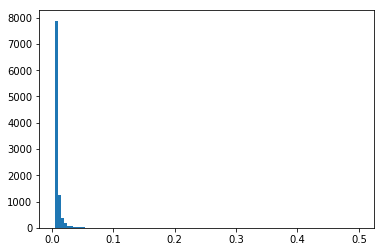

In [101]:
N = 10000
# produce activities 
from scipy.stats import norm,pareto
b = 2.1
dist = pareto(b).rvs(100000)
dist = np.random.choice(dist,N)
act = dict(zip(range(N),dist/(2.0*np.max(dist))))
plt.hist(act.values(),100)
mu, v  = np.mean(act.values()), np.mean(np.array(act.values())**2)
print mu, v

In [116]:
import imp
imp.reload(sad)

<module 'SAD' from 'SAD.py'>

# Memoryless graph

In [117]:
N = 1000
T = 500
k = 4

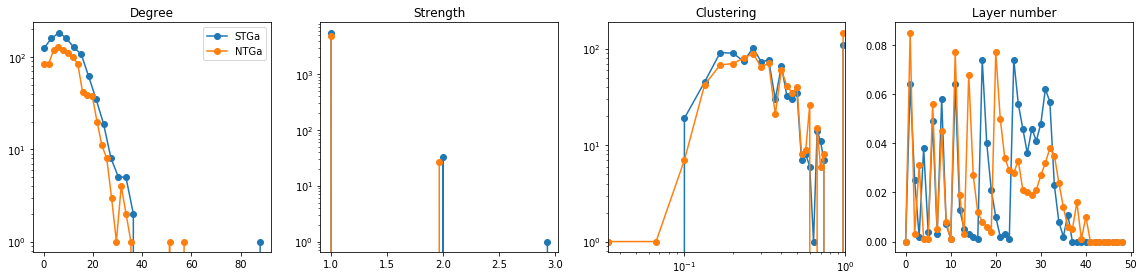

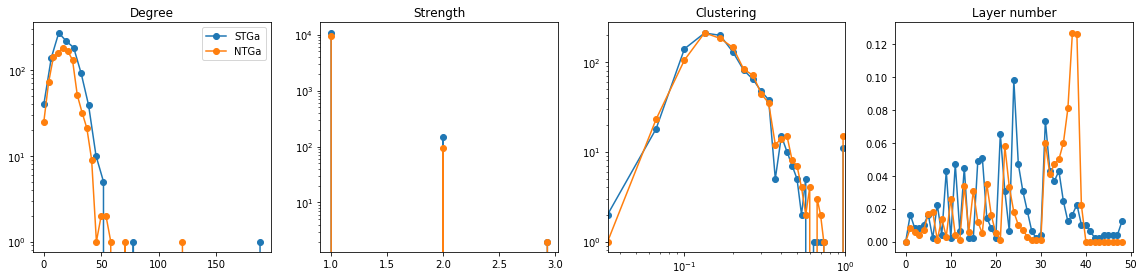

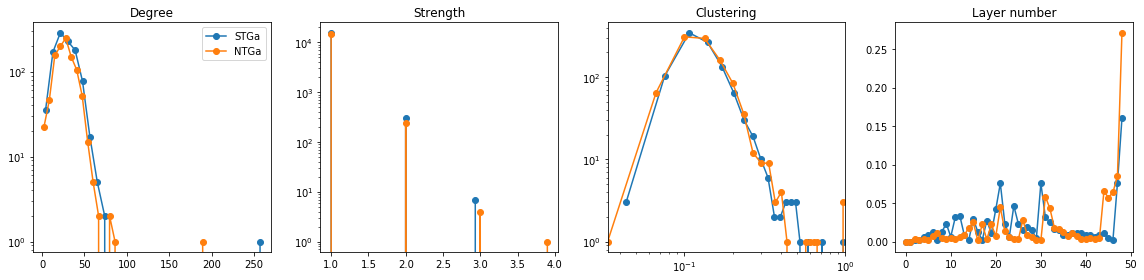

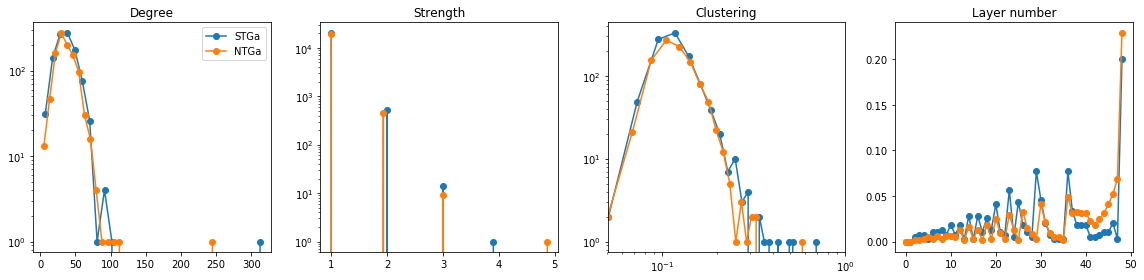

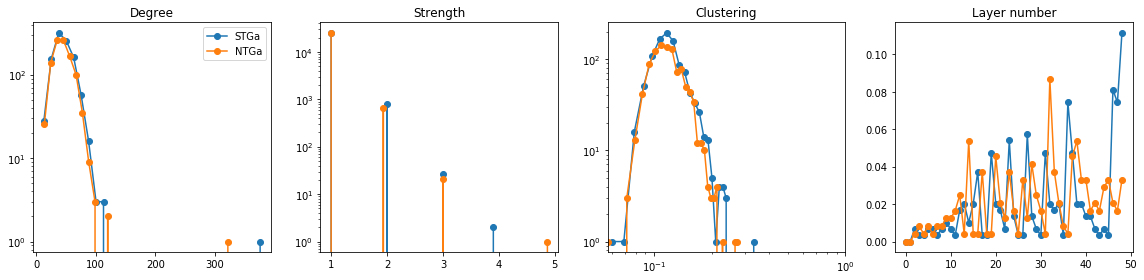

In [127]:
STG = sad.temporal_graph_creation(N,T,k,act,mode='simplicial')
NTG = sad.temporal_graph_creation(N,T,[4,2],act,mode='simplicial')

STGa = {}
NTGa = {}
for t in [100,200,300,400,499]:
    STGa[t] = sad.aggregate_graph(STG,t)
    NTGa[t] = sad.aggregate_graph(NTG,t)

pl = 4 
for t in [100,200,300,400,499]:
    fig = plt.figure(figsize=(16,4))
    plt.subplot(1,pl,1)
    aa, bb = np.histogram(STGa[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='STGa')
    aa, bb = np.histogram(NTGa[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='NTGa')
    plt.legend(loc=0)
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Degree')

    plt.subplot(1,pl,2)
    aa, bb = np.histogram(nx.get_edge_attributes(STGa[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.get_edge_attributes(NTGa[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Strength')

    plt.subplot(1,pl,3)
    aa, bb = np.histogram(nx.clustering(STGa[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.clustering(NTGa[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Clustering')
    plt.xlim(0,1)

    plt.subplot(1,pl,4)
    coreness, layerness = sad.onion_decomposition(STGa[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    coreness, layerness = sad.onion_decomposition(NTGa[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    plt.title('Layer number')

    plt.tight_layout()

Text(0.5,0,u'Clustering NTG')

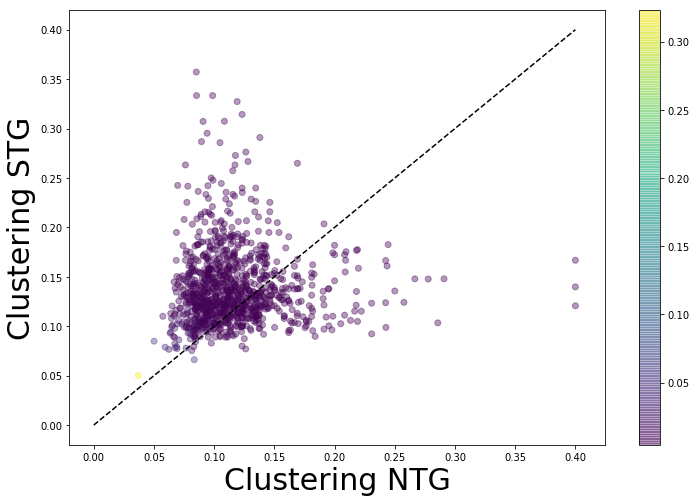

In [124]:
x = nx.clustering(NTGa[400]).values()
y = nx.clustering(STGa[400]).values()
z = act.values()[:N]
M = np.max([np.max(x), np.max(y)])

fig = plt.figure(figsize=(12,8))
plt.scatter(x,y,c=z,alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Clustering STG',fontsize=30)
plt.xlabel('Clustering NTG', fontsize=30)


# Memory graph 

In [ ]:
import imp
imp.reload(sad)

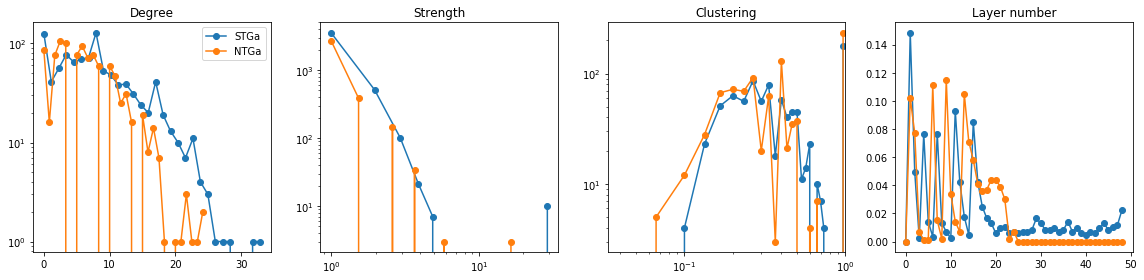

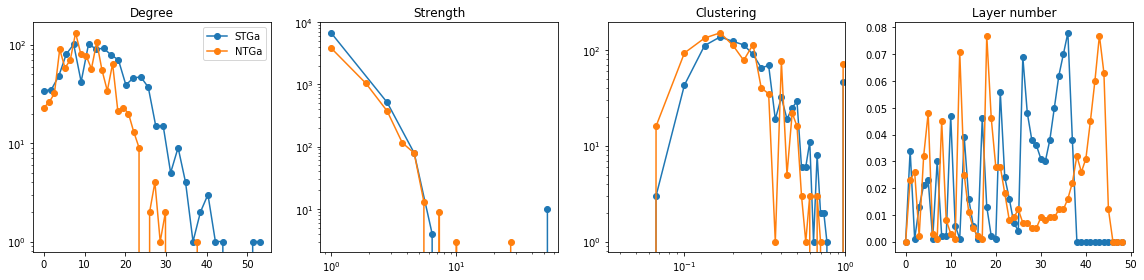

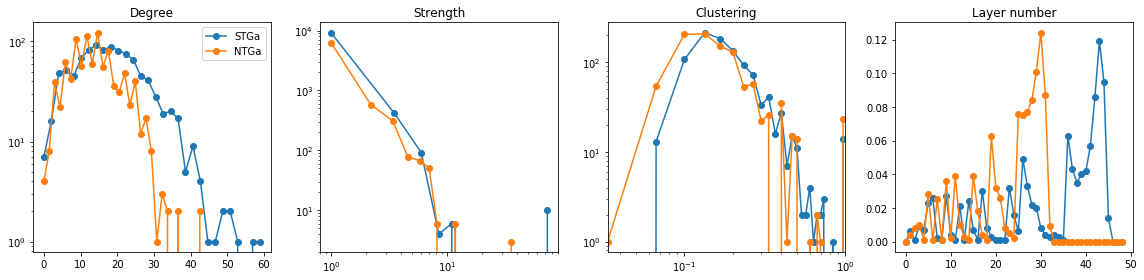

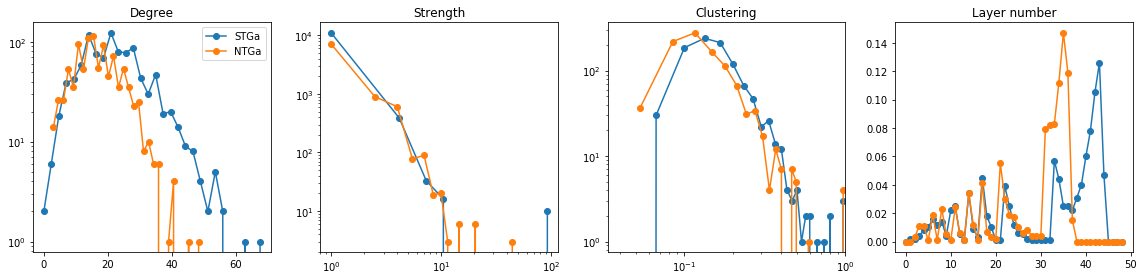

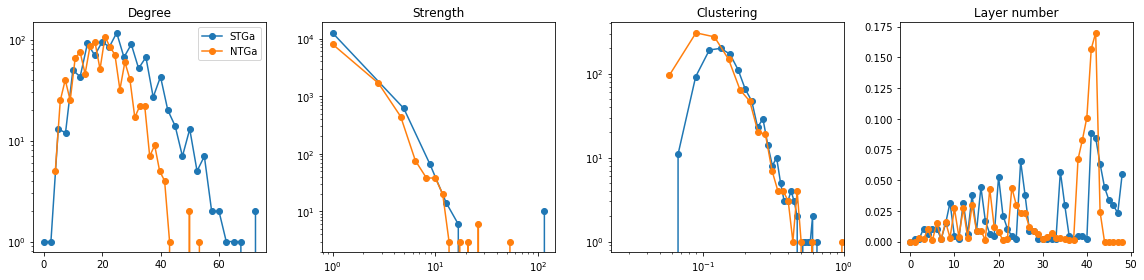

In [125]:
STG = sad.memory_temporal_graph_creation(N,T,k,act,'simplicial',alpha=1)
NTG = sad.memory_temporal_graph_creation(N,T,[4,1],act,'simplicial',alpha=1)

pl = 4;
STGa = {}
NTGa = {}
for t in [100,200,300,400,499]:
    STGa[t] = sad.aggregate_graph(STG,t)
    STGa[t].remove_edges_from(STGa[t].selfloop_edges())
    NTGa[t] = sad.aggregate_graph(NTG,t)
    NTGa[t].remove_edges_from(NTGa[t].selfloop_edges())

for t in [100,200,300,400,499]:
    fig = plt.figure(figsize=(16,4))
    plt.subplot(1,pl,1)
    aa, bb = np.histogram(STGa[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='STGa')
    aa, bb = np.histogram(NTGa[t].degree().values(), 30)
    plt.plot(bb[:-1],aa,'o-',label='NTGa')
    plt.legend(loc=0)
#    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Degree')

    plt.subplot(1,pl,2)
    aa, bb = np.histogram(nx.get_edge_attributes(STGa[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.get_edge_attributes(NTGa[t],'weight').values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Strength')

    plt.subplot(1,pl,3)
    aa, bb = np.histogram(nx.clustering(STGa[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    aa, bb = np.histogram(nx.clustering(NTGa[t]).values(), 30)
    plt.plot(bb[:-1],aa,'o-')
    plt.xscale('log')
    plt.yscale('log') 
    plt.title('Clustering')
    plt.xlim(0,1)
    
    plt.subplot(1,pl,4)
    coreness, layerness = sad.onion_decomposition(STGa[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    coreness, layerness = sad.onion_decomposition(NTGa[t])
    aa, bb = np.histogram(layerness.values(), range(50), normed=True)
    plt.plot(bb[:-1],aa,'o-')
    plt.title('Layer number')


    plt.tight_layout()

Text(0.5,0,u'Clustering NTG')

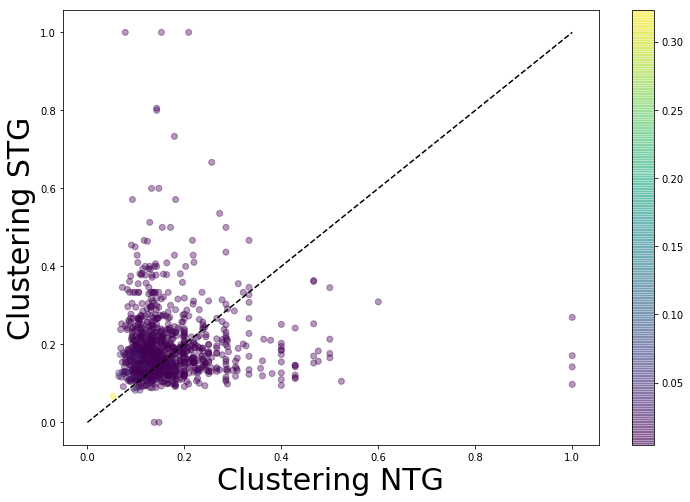

In [126]:
x = nx.clustering(NTGa[400]).values()
y = nx.clustering(STGa[400]).values()
z = act.values()[:N]
M = np.max([np.max(x), np.max(y)])

fig = plt.figure(figsize=(12,8))
plt.scatter(x,y,c=z,alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Clustering STG',fontsize=30)
plt.xlabel('Clustering NTG', fontsize=30)


In [ ]:
x, x0 = sad.onion_decomposition(NTGa[400])
y, y0 = sad.onion_decomposition(STGa[400])
z = act.values()[:N]
M = np.max([np.max(x.values()), np.max(y.values())])

fig = plt.figure(figsize=(12,8))
plt.scatter(x0.values(),y0.values(),c=x.values(),s=3*np.array(y.values()),alpha=0.4)
plt.colorbar()
plt.plot(np.linspace(0,M,10),np.linspace(0,M,10),'--k')
plt.ylabel('Layer STG',fontsize=30)
plt.xlabel('Layer NTG', fontsize=30)
